In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from config.settings import settings
from scipy.stats import pearsonr

In [5]:
DATASETS_BASE = settings.MODULES_TO_DATASETS_PATH

In [7]:
df1_4 = pd.read_csv(DATASETS_BASE + settings.DATA_EU_AIR_F1_4, low_memory=False)

In [8]:
df_pivoted = df1_4.pivot_table(index=['FacilityInspireID', 'reportingYear'],
                                columns='pollutant',
                                values='emissions',
                                aggfunc='sum').reset_index()

df_pivoted.reset_index(inplace=True)
df_pivoted.iloc[:, 3:] = df_pivoted.iloc[:, 3:].fillna(0)

In [9]:
df_unique = df1_4.drop_duplicates(subset=['FacilityInspireID', 'reportingYear']).drop(columns=['pollutant', 'emissions'])

In [10]:
df_final = pd.merge(df_unique, df_pivoted, on=['FacilityInspireID', 'reportingYear'], how='left')
df_final = df_final.drop(columns=['index'])

In [12]:
correlation_matrix = df_final.iloc[:, 15:].corr(method='pearson')

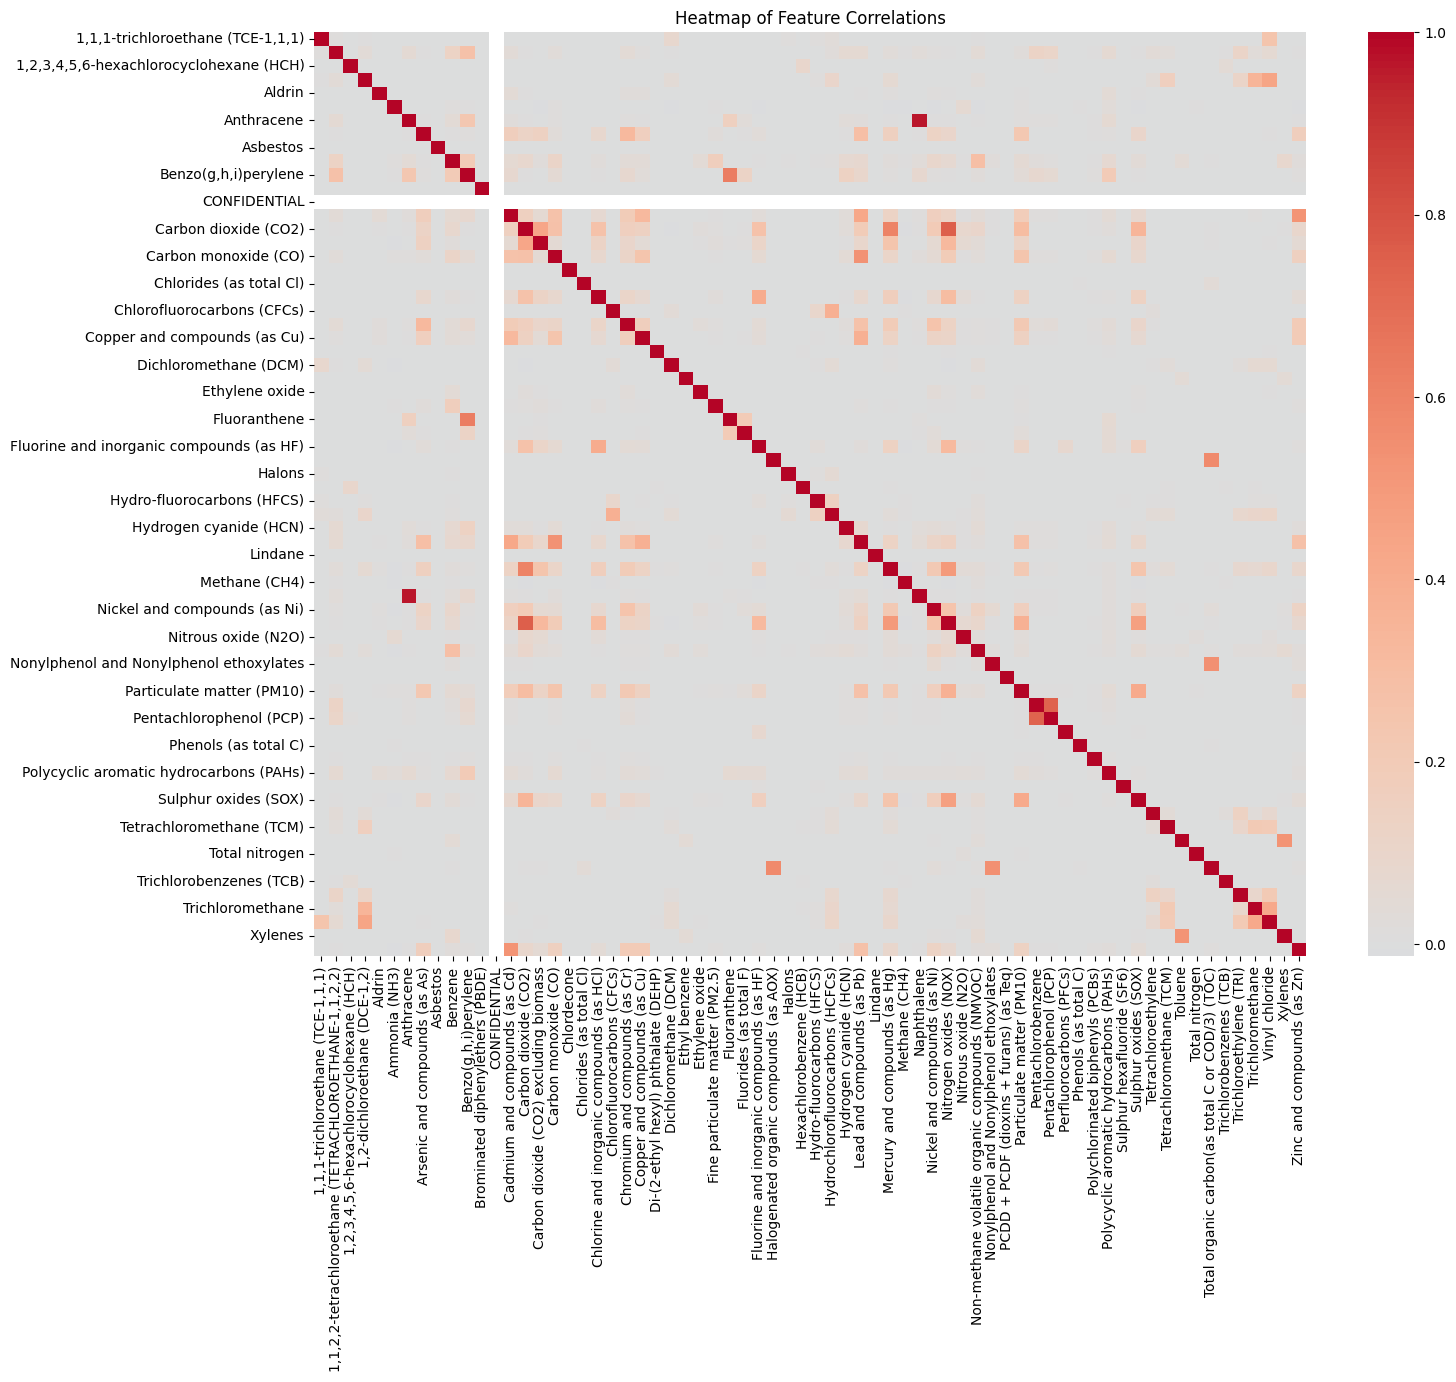

In [13]:
plt.figure(figsize=(16, 12))

heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)

plt.title('Heatmap of Feature Correlations')

plt.show()

In [18]:
threshold = 0.75  # This is an arbitrary threshold

high_correlations = np.where(np.abs(correlation_matrix) > threshold)

high_correlations = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                     for x, y in zip(*high_correlations)
                     if x != y and x < y]

In [19]:
for pair in high_correlations:
    corr_value, p_value = pearsonr(df_final[pair[0]], df_final[pair[1]])
    print(f"Correlation between {pair[0]} and {pair[1]}: {corr_value}, P-value: {p_value}")

Correlation between Anthracene and Naphthalene: 0.9613208385861247, P-value: 0.0
Correlation between Carbon dioxide (CO2) and Nitrogen oxides (NOX): 0.7564119404285217, P-value: 0.0


In [7]:
new_excel = pd.read_excel(DATASETS_BASE + "datasets/Industrial_Reporting_Facilities_relevant_contribution.xlsx")

In [8]:
new_excel.head()

,countryName,targetRelease,Pollutant,EPRTR_AnnexI_MainActivity,FacilityInspireId,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,AIR,Ammonia (NH3),1(c),AT.EEA/5746.FACILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000.0,NaN,NaN,NaN,NaN,NaN
1,Austria,AIR,Ammonia (NH3),6(b),AT.CAED/9008390537091.FACILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31800.0,32000.0,NaN
2,Austria,AIR,Ammonia (NH3),6(b),AT.EEA/5893.FACILITY,NaN,26200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,AIR,Ammonia (NH3),8(b),AT.EEA/284923.FACILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70100.0,NaN,NaN,NaN,NaN,NaN
4,Austria,AIR,Cadmium and compounds (as Cd),2(b),AT.CAED/9008390975701.FACILITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.9,86.6,83.8,NaN,NaN


In [10]:
new_excel.columns

Index(['countryName', 'targetRelease', 'Pollutant',
       'EPRTR_AnnexI_MainActivity', 'FacilityInspireId', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [11]:
new_excel.FacilityInspireId.unique

<bound method Series.unique of 0                 AT.EEA/5746.FACILITY
1       AT.CAED/9008390537091.FACILITY
2                 AT.EEA/5893.FACILITY
3               AT.EEA/284923.FACILITY
4       AT.CAED/9008390975701.FACILITY
                     ...              
4875      UK.CAED/EW_EA-16856.FACILITY
4876       UK.CAED/EW_EA-6367.FACILITY
4877             GB.EEA/33111.FACILITY
4878             GB.EEA/13397.FACILITY
4879        UK.SEPA/200000014.Facility
Name: FacilityInspireId, Length: 4880, dtype: object>